# Планирование эксперимента. Лабораторная работа №1

Стандартная преамбула для улучшения визуализации.

In [749]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
import scipy.stats

# Make the graphs a bit prettier, and bigger
plt.show(block=True)
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

Загружаем датасет.

In [525]:
dataset = pd.read_csv("athlete_events.csv")
dataset[:10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


Для лабораторной работы будем использовать ряд возрастов атлетов.

In [526]:
ages = dataset['Age']
ages = ages[ages.notnull()]
ages.unique()

array([24., 23., 34., 21., 25., 27., 31., 33., 18., 26., 22., 30., 32.,
       28., 54., 20., 17., 43., 47., 29., 41., 45., 49., 53., 57., 19.,
       38., 35., 16., 37., 15., 42., 46., 40., 36., 14., 39., 48., 52.,
       44., 55., 50., 71., 63., 51., 58., 13., 60., 75., 65., 56., 64.,
       68., 84., 12., 72., 59., 61., 70., 74., 62., 67., 69., 73., 66.,
       11., 76., 88., 96., 80., 10., 81., 77., 97.])

Разбиваем значения на 6 равных интервалов и вычисляем эмпирическую частоту попадания в каждый интервал.

In [527]:
df = pd.DataFrame({'Эмп. частота': ages})
table = df.groupby(pd.cut(df['Эмп. частота'], 6)).count()
table.index.name = 'Интервалы'
table

,Эмп. частота
Интервалы,
"(9.913, 24.5]",131134
"(24.5, 39.0]",121597
"(39.0, 53.5]",7616
"(53.5, 68.0]",1106
"(68.0, 82.5]",183
"(82.5, 97.0]",6


Вычислим среднее значение на каждом интервале.

In [528]:
midpoints = pd.DataFrame({'Ср. на интевале': [val.mid for val in table.index]}, index=table.index)
table = table.add(midpoints, fill_value=0)
table

,Ср. на интевале,Эмп. частота
Интервалы,,
"(9.913, 24.5]",17.2065,131134.0
"(24.5, 39.0]",31.7500,121597.0
"(39.0, 53.5]",46.2500,7616.0
"(53.5, 68.0]",60.7500,1106.0
"(68.0, 82.5]",75.2500,183.0
"(82.5, 97.0]",89.7500,6.0


Вычисляем эмпирическую вероятность попадания в интервал.

In [529]:
probabs = pd.DataFrame({'Эмп. вероятность': [val / table['Эмп. частота'].sum() 
                                             for val in table['Эмп. частота']]}, index=table.index)
table = table.add(probabs, fill_value=0)
table

,Ср. на интевале,Эмп. вероятность,Эмп. частота
Интервалы,,,
"(9.913, 24.5]",17.2065,0.501196,131134.0
"(24.5, 39.0]",31.7500,0.464746,121597.0
"(39.0, 53.5]",46.2500,0.029108,7616.0
"(53.5, 68.0]",60.7500,0.004227,1106.0
"(68.0, 82.5]",75.2500,0.000699,183.0
"(82.5, 97.0]",89.7500,0.000023,6.0


Рассчитываем значения функции распределения вероятности.

In [530]:
fx_df = pd.DataFrame({'F(x)': [table['Эмп. вероятность'][:i].sum()
                               for i, val in enumerate(table['Эмп. вероятность'])]}, index=table.index)
table = table.add(fx_df, fill_value=0)
table

,F(x),Ср. на интевале,Эмп. вероятность,Эмп. частота
Интервалы,,,,
"(9.913, 24.5]",0.000000,17.2065,0.501196,131134.0
"(24.5, 39.0]",0.501196,31.7500,0.464746,121597.0
"(39.0, 53.5]",0.965942,46.2500,0.029108,7616.0
"(53.5, 68.0]",0.995050,60.7500,0.004227,1106.0
"(68.0, 82.5]",0.999278,75.2500,0.000699,183.0
"(82.5, 97.0]",0.999977,89.7500,0.000023,6.0


In [531]:
xipi = pd.DataFrame({'Xi*Pi': [table['Ср. на интевале'][i] * val
                               for i, val in enumerate(table['Эмп. вероятность'])]}, index=table.index)
table = table.add(xipi, fill_value=0)
table

,F(x),Xi*Pi,Ср. на интевале,Эмп. вероятность,Эмп. частота
Интервалы,,,,,
"(9.913, 24.5]",0.000000,8.623834,17.2065,0.501196,131134.0
"(24.5, 39.0]",0.501196,14.755677,31.7500,0.464746,121597.0
"(39.0, 53.5]",0.965942,1.346267,46.2500,0.029108,7616.0
"(53.5, 68.0]",0.995050,0.256799,60.7500,0.004227,1106.0
"(68.0, 82.5]",0.999278,0.052632,75.2500,0.000699,183.0
"(82.5, 97.0]",0.999977,0.002058,89.7500,0.000023,6.0


In [532]:
xi2pi = pd.DataFrame({'(Xi^2)*Pi': [(table['Ср. на интевале'][i] ** 2) * val
                               for i, val in enumerate(table['Эмп. вероятность'])]}, index=table.index)
table = table.add(xi2pi, fill_value=0)
table

,(Xi^2)*Pi,F(x),Xi*Pi,Ср. на интевале,Эмп. вероятность,Эмп. частота
Интервалы,,,,,,
"(9.913, 24.5]",148.385999,0.000000,8.623834,17.2065,0.501196,131134.0
"(24.5, 39.0]",468.492734,0.501196,14.755677,31.7500,0.464746,121597.0
"(39.0, 53.5]",62.264850,0.965942,1.346267,46.2500,0.029108,7616.0
"(53.5, 68.0]",15.600562,0.995050,0.256799,60.7500,0.004227,1106.0
"(68.0, 82.5]",3.960560,0.999278,0.052632,75.2500,0.000699,183.0
"(82.5, 97.0]",0.184719,0.999977,0.002058,89.7500,0.000023,6.0


In [533]:
ivals = [None] * 6
for i, val in enumerate(table['Эмп. частота']):
    ivals[i] = np.zeros(0)

In [534]:
a = np.sort(ages)
left = 0
for i, val in enumerate(table.index.values):
    condition = np.logical_and(a > val.left, a <= val.right)
    ivals[i] = np.array(np.extract(condition, a))

In [535]:
disp = pd.DataFrame({'Дисперсия': [np.std(val) ** 2 for i, val in enumerate(ivals)]}, index=table.index)
table = table.add(disp, fill_value=0)
table

,(Xi^2)*Pi,F(x),Xi*Pi,Дисперсия,Ср. на интевале,Эмп. вероятность,Эмп. частота
Интервалы,,,,,,,
"(9.913, 24.5]",148.385999,0.000000,8.623834,5.780303,17.2065,0.501196,131134.0
"(24.5, 39.0]",468.492734,0.501196,14.755677,11.962035,31.7500,0.464746,121597.0
"(39.0, 53.5]",62.264850,0.965942,1.346267,13.701518,46.2500,0.029108,7616.0
"(53.5, 68.0]",15.600562,0.995050,0.256799,16.254827,60.7500,0.004227,1106.0
"(68.0, 82.5]",3.960560,0.999278,0.052632,6.437756,75.2500,0.000699,183.0
"(82.5, 97.0]",0.184719,0.999977,0.002058,22.138889,89.7500,0.000023,6.0


In [536]:
across_group = pd.DataFrame({'Межгрупп. дисп.': 
                             [((ivals[i].mean() - ages.mean()) ** 2) * val 
                              for i, val in enumerate(table['Эмп. частота'])]
                            }, index=table.index).round(3)
table = table.add(across_group, fill_value=0)
table

,(Xi^2)*Pi,F(x),Xi*Pi,Дисперсия,Межгрупп. дисп.,Ср. на интевале,Эмп. вероятность,Эмп. частота
Интервалы,,,,,,,,
"(9.913, 24.5]",148.385999,0.000000,8.623834,5.780303,2678610.506,17.2065,0.501196,131134.0
"(24.5, 39.0]",468.492734,0.501196,14.755677,11.962035,1340242.902,31.7500,0.464746,121597.0
"(39.0, 53.5]",62.264850,0.965942,1.346267,13.701518,2690853.938,46.2500,0.029108,7616.0
"(53.5, 68.0]",15.600562,0.995050,0.256799,16.254827,1242955.832,60.7500,0.004227,1106.0
"(68.0, 82.5]",3.960560,0.999278,0.052632,6.437756,381370.381,75.2500,0.000699,183.0
"(82.5, 97.0]",0.184719,0.999977,0.002058,22.138889,25046.533,89.7500,0.000023,6.0


In [537]:
index = [pd.Interval(9.913, 97.0, closed='right')]
general = pd.DataFrame({'Эмп. частота': [len(ages)],
                  'F(x)': table['F(x)'][-1] + table['Эмп. вероятность'][-1],
                  'Ср. на интевале': index[0].mid,
                  'Эмп. вероятность': 1.0,
                  'Xi*Pi': index[0].mid * 1.0,
                  '(Xi^2)*Pi': (index[0].mid ** 2) * 1.0,
                  'Дисперсия': sum([table['Дисперсия'][i] * count 
                                for i, count in enumerate(table['Эмп. частота'])])
                   / table['Эмп. частота'].sum(),
                  'Межгрупп. дисп.': table['Межгрупп. дисп.'].sum() / table['Эмп. частота'].sum()
                  },
                  index=index).round(3)
general.index.name = 'Интервалы'
general

,Эмп. частота,F(x),Ср. на интевале,Эмп. вероятность,Xi*Pi,(Xi^2)*Pi,Дисперсия,Межгрупп. дисп.
Интервалы,,,,,,,,
"(9.913, 97.0]",261642,1.0,53.456,1.0,53.456,2857.597,8.929,31.949


In [538]:
res = table.add(general, fill_value=0)
res

,(Xi^2)*Pi,F(x),Xi*Pi,Дисперсия,Межгрупп. дисп.,Ср. на интевале,Эмп. вероятность,Эмп. частота
Интервалы,,,,,,,,
"(9.913, 24.5]",148.385999,0.000000,8.623834,5.780303,2678610.506,17.2065,0.501196,131134.0
"(9.913, 97.0]",2857.597000,1.000000,53.456000,8.929000,31.949,53.4560,1.000000,261642.0
"(24.5, 39.0]",468.492734,0.501196,14.755677,11.962035,1340242.902,31.7500,0.464746,121597.0
"(39.0, 53.5]",62.264850,0.965942,1.346267,13.701518,2690853.938,46.2500,0.029108,7616.0
"(53.5, 68.0]",15.600562,0.995050,0.256799,16.254827,1242955.832,60.7500,0.004227,1106.0
"(68.0, 82.5]",3.960560,0.999278,0.052632,6.437756,381370.381,75.2500,0.000699,183.0
"(82.5, 97.0]",0.184719,0.999977,0.002058,22.138889,25046.533,89.7500,0.000023,6.0


In [539]:
general_disp = general['Дисперсия'] + general['Межгрупп. дисп.']
general_disp

Интервалы
(9.913, 97.0]    40.878
dtype: float64

In [540]:
det_coeff = general['Межгрупп. дисп.'] / general_disp
det_coeff

Интервалы
(9.913, 97.0]    0.78157
dtype: float64

Вычислим эмпирическое корреляционное отношение

In [541]:
np.sqrt(det_coeff)

Интервалы
(9.913, 97.0]    0.884064
dtype: float64

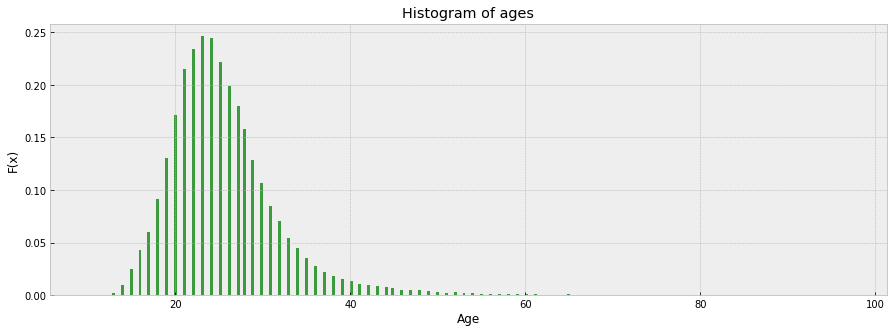

In [787]:
n, bins, patches = plt.hist(ages, 256, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Age')
plt.ylabel('F(x)')
plt.title('Histogram of ages')
plt.grid(True)

plt.show()